#                   EDA Movie Dataset On Netflix, Prime Video, Hulu, Disney+

<img src="https://vnreview.vn/image/21/11/52/2111525.jpg" width="60%"  height="0%" align="right" hspace="5%" vspace="5%"/>

In the Project, we focus on EDA The Movie Dataset through 3 step

**1. Problem Understanding:** 

Determine main purpose to find insight. At the same, make a plan to ensure quote

**2. Data Understanding:** 

Import, understand meaning of obverses. Performing some steps:
- Import libraries
- Data cleaning (Missing value, filter necessary features, data type checking, data shape, data duplicates...)
- Data describe
- EDA
- Data quality checking: check distribution, data have problem ?, outliers, missing value ?

**3. Data Preparation:**

Processing data with revising some problems in Data quality checking
- Fillna Missing Value
- Standardization 
- Normalization
- Sampling

**4. Testing Hypothesis**
- Using some statistic technique to follow hypothesis

**5. Final Conclusions**




<hr style="height: 0.5px; border: 0; background-color: #808080">

**1. PROBLEM UNDERSTANDING**

Exploration Data Analysis some features of movie


*   IMDb Rating
*   Rotten Tomatoes
*   Channel 
*   Genre
*   Country
*   Runtime






**2. DATA UNDERSTANDING**

***2.1 IMPORT LIBRARIES AND DATA ***

In [5]:
# Import libraries
import pandas as pd # Library pandas will be required to work with data 
import numpy as np # Library numpy will be required to round the data in the correlation matrix
from pandas import DataFrame, Series

In [6]:
# Library matplotlib, seaborn, plotly required for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as pe
! pip install squarify
import squarify # Library is used for visualizing treemap
import warnings # Ignore the warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [7]:
# Library scipy will be required to test hypotheses.
import scipy
from scipy.stats import shapiro 

In [8]:
# Import data
df = pd.read_csv("Test Movie.csv")
df.head(2)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,0.87,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,0.87,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0


**2.2 DATA CLEANING**

We see Unnamed: 0, ID, Type aren't necessary, so we remove it 

In [9]:
df.drop(df[["Unnamed: 0","ID","Type"]],axis=1, inplace = True)
df.head(2)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,0.87,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,0.87,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0


In [10]:
# Check the shape of dataset
df.shape
print(f'Data Have {df.shape[0]} Rows And {df.shape[1]} Columns')

Data Have 16744 Rows And 14 Columns


In [11]:
# Now check dtype each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            16744 non-null  object 
 1   Year             16744 non-null  int64  
 2   Age              7354 non-null   object 
 3   IMDb             16173 non-null  float64
 4   Rotten Tomatoes  5158 non-null   float64
 5   Netflix          16744 non-null  int64  
 6   Hulu             16744 non-null  int64  
 7   Prime Video      16744 non-null  int64  
 8   Disney+          16744 non-null  int64  
 9   Directors        16018 non-null  object 
 10  Genres           16469 non-null  object 
 11  Country          16309 non-null  object 
 12  Language         16145 non-null  object 
 13  Runtime          16152 non-null  float64
dtypes: float64(3), int64(5), object(6)
memory usage: 1.8+ MB


We have some of columns have null value and incorrect dtype. At the same time, we need group by some channel colums to one

In [12]:
# Prior we see age exists with "Age" plus => That why we need remove "+" and transfer to int
#df["Age"] = df["Age"].str[:-1] # Drop the last character

Caculating the missing value percent

In [13]:
# Check the null value
missing_value = df.isnull().sum() # missing value

missing_percent = round(missing_value/df.shape[0]*100,3)
missing_percent

Title               0.000
Year                0.000
Age                56.080
IMDb                3.410
Rotten Tomatoes    69.195
Netflix             0.000
Hulu                0.000
Prime Video         0.000
Disney+             0.000
Directors           4.336
Genres              1.642
Country             2.598
Language            3.577
Runtime             3.536
dtype: float64

Age and Rotten Tomatoes have amount of null values > 56% and we need to more explore it before removing. Anothers have a little bit NaN so it don't affect so much

In [14]:
# Describe Age and Rotten Tomatoes
df.describe()

,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Runtime
count,16744.000000,16173.000000,5158.000000,16744.000000,16744.000000,16744.000000,16744.000000,16152.000000
mean,2003.014035,5.902751,0.654285,0.212613,0.053930,0.737817,0.033684,93.413447
std,20.674321,1.347867,0.266145,0.409169,0.225886,0.439835,0.180419,28.219222
min,1902.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2000.000000,5.100000,0.440000,0.000000,0.000000,0.000000,0.000000,82.000000
50%,2012.000000,6.100000,0.710000,0.000000,0.000000,1.000000,0.000000,92.000000
75%,2016.000000,6.900000,0.880000,0.000000,0.000000,1.000000,0.000000,104.000000
max,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1256.000000


Fillna Missing Value

In [15]:
# We can see the range of Rotten Tomatoes is in [0,1] and we can replace NaN of Rotten Tomatoes with mean
df["Rotten Tomatoes"].fillna(df["Rotten Tomatoes"].mean(), inplace = True)

In [16]:
# "Age" columns have a lot of NaN, but because of important so we will fill NaN to Compling each countries 
df["Age"] = df["Age"].fillna("Others")

In [17]:
# "Directors","Genres","Country","Language","IMDb" we don't know, so I think we should
df["IMDb"] = df["IMDb"].fillna(df["IMDb"].mean())
df["Genres"] = df["Genres"].fillna("Others")
df["Directors"] = df["Directors"].fillna("Unknow")
df["Country"] = df["Country"].fillna("Others")
df["Language"] = df["Language"].fillna("Others")
# With runtime, I think we need to get the value equal to previous value
df["Runtime"] = df["Runtime"].fillna(method = 'pad')
df.head(2)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,0.87,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,0.87,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0


Finding Duplicated Value

In [18]:
# Checking duplicated value in each column
cols = list(df.columns)
for col in cols:
  if df[col].duplicated().any() == True:
    print(f'Column {col} has duplicated values')
  else:
    print(f'Column {col}  have not duplicated values')

Column Title  have not duplicated values
Column Year has duplicated values
Column Age has duplicated values
Column IMDb has duplicated values
Column Rotten Tomatoes has duplicated values
Column Netflix has duplicated values
Column Hulu has duplicated values
Column Prime Video has duplicated values
Column Disney+ has duplicated values
Column Directors has duplicated values
Column Genres has duplicated values
Column Country has duplicated values
Column Language has duplicated values
Column Runtime has duplicated values


Group by some channels to one column

In [19]:
# Next, we wanna create "Channel" include "Netflix","Hulu","Prime Video","Disney+"
lists = ["Title","Year","Age","IMDb","Rotten Tomatoes","Directors","Genres","Country","Language","Runtime"]
df = pd.melt(df, id_vars= lists ,var_name="Channel",value_vars=["Netflix","Hulu","Prime Video","Disney+"],value_name ="Value")
df.head(2)

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,Channel,Value
0,Inception,2010,13+,8.8,0.87,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,Netflix,1
1,The Matrix,1999,18+,8.7,0.87,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,Netflix,1


In [20]:
# However, if we do that, the number of title will repeat four times, so we should have a condition to filter
filter_Netflix = df[(df["Value"] == 1) & (df["Channel"] == "Netflix")]
filter_Disney = df[(df["Value"] == 1) & (df["Channel"] == "Disney+")]
filter_PrimeVideo = df[(df["Value"] == 1) & (df["Channel"] == "Prime Video")]
filter_Hulu = df[(df["Value"] == 1) & (df["Channel"] == "Hulu")]

In [21]:
# We join 4 dataframe to joint df
frames = [filter_Netflix,filter_Disney,filter_PrimeVideo,filter_Hulu]
df_join=pd.concat(frames)
df_join.head(5)

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,Channel,Value
0,Inception,2010,13+,8.8,0.87,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,Netflix,1
1,The Matrix,1999,18+,8.7,0.87,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,Netflix,1
2,Avengers: Infinity War,2018,13+,8.5,0.84,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,Netflix,1
3,Back to the Future,1985,7+,8.5,0.96,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,Netflix,1
4,"The Good, the Bad and the Ugly",1966,18+,8.8,0.97,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,Netflix,1


In [22]:
# Compare df_join and df
print (df_join.shape)

(17381, 12)


In [54]:
# Save df to file excel
name_file = 'Cleaning Movie Dataset.csv'
df_join.to_csv(name_file)

*** 2.3 DATA EXPLORATION ANALYTICS***

In [23]:
# Now we have some questions:
# 1/ Which channel is more popular over time?
# 2/ Which channel is more popular with each age?
# 3/ How is the distribution between IMDb, Runtime?
# 4/ How is the distribution of IMDb and Runtime In Each Channel? 
# 5/ Which movies have the highest IMDb?
# 6/ Which genres are the most popular?
# 7/ Which languages are more popular in movies?
# 8/ Which channel has the highest number of movies on this dataset
# 9/ Which movies have the highest IMDb in each channel?
# 10/ How is the relationship between IMDb and Runtime?

1/ Which channel is the most popular over time?

In [24]:
# We must group by number of movies with year and channel
groupby = df_join.groupby([df_join.Year,df_join.Channel]).sum().reset_index()
# Show Chart
plt.figure(figsize=(13,8))
groupby = groupby[(groupby.Year>1990) & (groupby.Year<2020)]
#sns.lineplot(x = "Year",y = "Value", hue ="Channel", data = groupby)
pe.line(groupby,x="Year",y="Value",line_group="Channel",color = "Channel",title="Number of Movies In Each Channel By The Time")

<Figure size 936x576 with 0 Axes>

**Conclusion**: From 1991 to 2019, the number of movies on Prime Video channel always capture the majority of the movie market. Especially, the period before 2007, watching movie service is not popular like now, except Prime Video early participate in this field.

However, Prime Video start going down after the fast development in 2013. Instead of debut 811 movies in 2013, this channel just only publish 172 movies in 2019. During this time, the growth of Netflix is so amazing and surpass Prime Video to become a best service for watching online movie

While, Disney+ is a channal that publishes the fewest movies with the average number of debut movies less than 10 movies one year

2/which channel is more popular with each age?

In [25]:
# We must group by number of movies with year and channel
def age(x):
  groupby_age = df_join.groupby([df_join.Year,df_join.Age,df_join.Channel]).sum().reset_index()
  return groupby_age.loc[(groupby_age["Channel"] == x) & (groupby_age["Year"]>1990) & (groupby_age["Year"]<2020)]

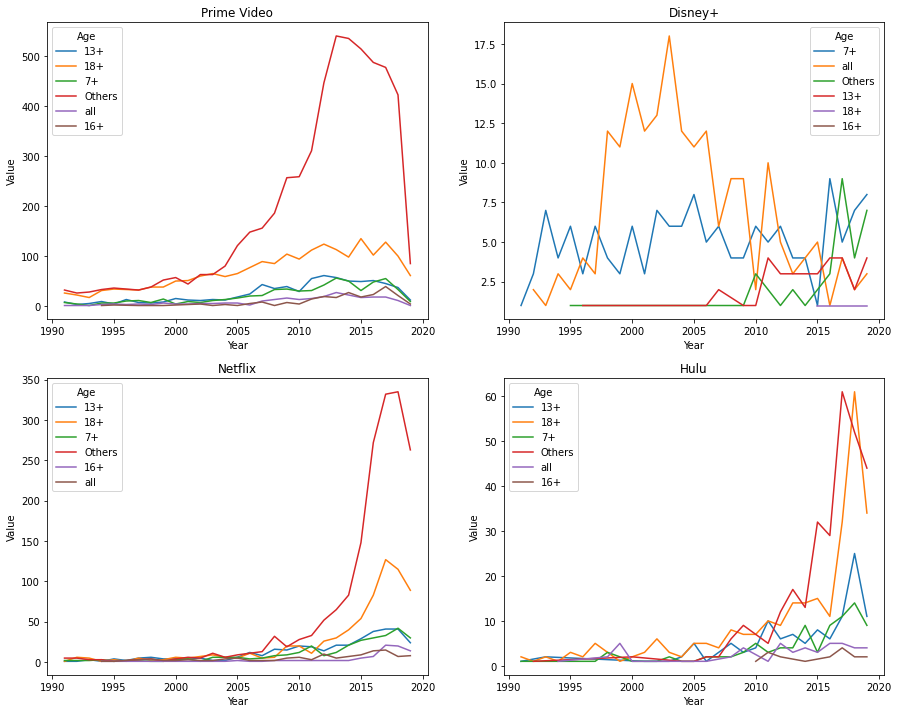

In [26]:
fig,ax = plt.subplots(2,2,figsize=(15,12))
ax1 = sns.lineplot(data = age("Netflix"), x= age("Netflix")["Year"], y = age("Netflix")["Value"],hue = age("Netflix")["Age"],ax=ax[1,0])
ax2 = sns.lineplot(data = age("Disney+"), x= age("Disney+")["Year"], y = age("Disney+")["Value"],hue = age("Disney+")["Age"],ax=ax[0,1])
ax3 = sns.lineplot(data = age("Hulu"), x= age("Hulu")["Year"], y = age("Hulu")["Value"],hue = age("Hulu")["Age"],ax=ax[1,1])
ax4 = sns.lineplot(data = age("Prime Video"), x= age("Prime Video")["Year"], y = age("Prime Video")["Value"],hue = age("Prime Video")["Age"],ax=ax[0,0])
ax1.title.set_text("Netflix")
ax2.title.set_text("Disney+")
ax3.title.set_text("Hulu")
ax4.title.set_text("Prime Video")

Because of the lack of data, amount of Others Age is very much and it can affect significantly to conclusion

**Conclusion**: 
Almost all channels focus on releasing movies of 18+ age. But with Disney+, this channel focus on publishing some programs or TV show for kids and teens that with 7+ age through the development process 

3/ How is the distribution between IMDb, Runtime ?

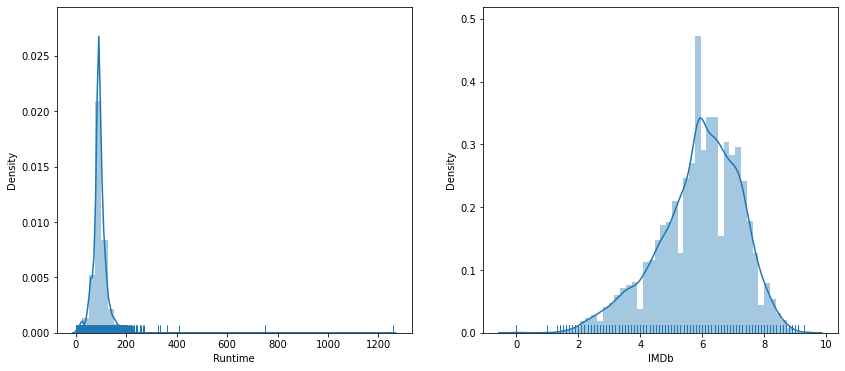

In [27]:
fig,ax = plt.subplots(1,2,figsize=(14,6))
sns.distplot(df_join["Runtime"], rug = True, ax = ax[0])
sns.distplot(df_join["IMDb"], rug = True, ax = ax[1])
plt.show()

**Conclusion**: 
With runtime, outliers appear with extremely far spot. The distribution nearly look like standard and mean is 100

IMDb have a normal distribution with fat tail and mean equal 6

4/ How is the distribution of IMDb and Runtime In Each Channel?

In [28]:
# Distribution of IMDb
def factor(x):
  fig,ax = plt.subplots(2,2,figsize=(14,12))
  sns.distplot(filter_Netflix[x], rug = True, ax = ax[0,0]).title.set_text("Netflix")
  sns.distplot(filter_Hulu[x], rug = True, ax = ax[0,1]).title.set_text("Hulu")
  sns.distplot(filter_Disney[x], rug = True, ax = ax[1,0]).title.set_text("Disney+")
  sns.distplot(filter_PrimeVideo[x], rug = True, ax = ax[1,1]).title.set_text("Prime Video")
  plt.show()

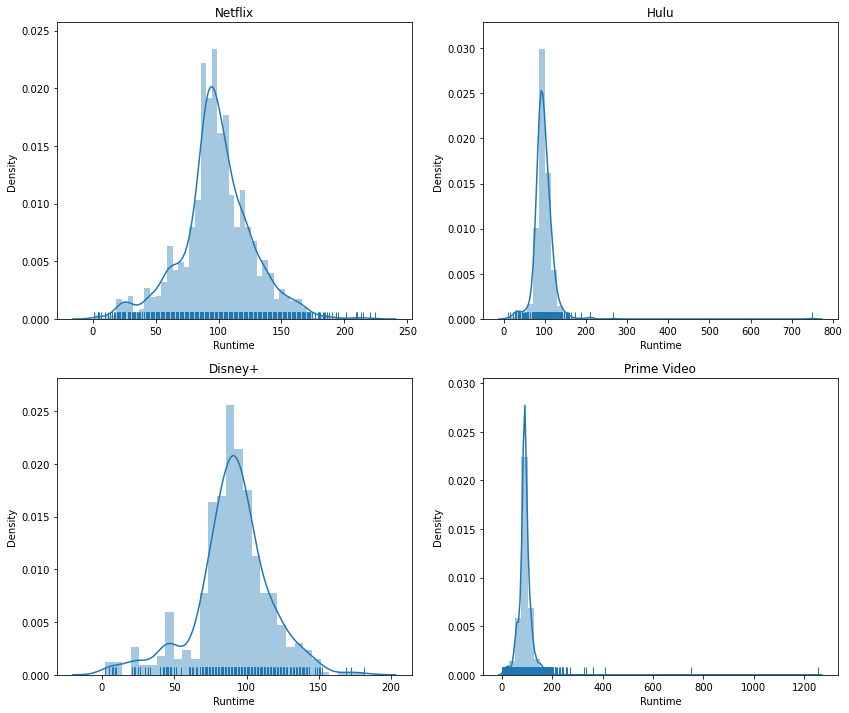

In [29]:
factor("Runtime")

With Runtime Distribution for 4 Channels. Hulu and Prime Video have some extremely outliers

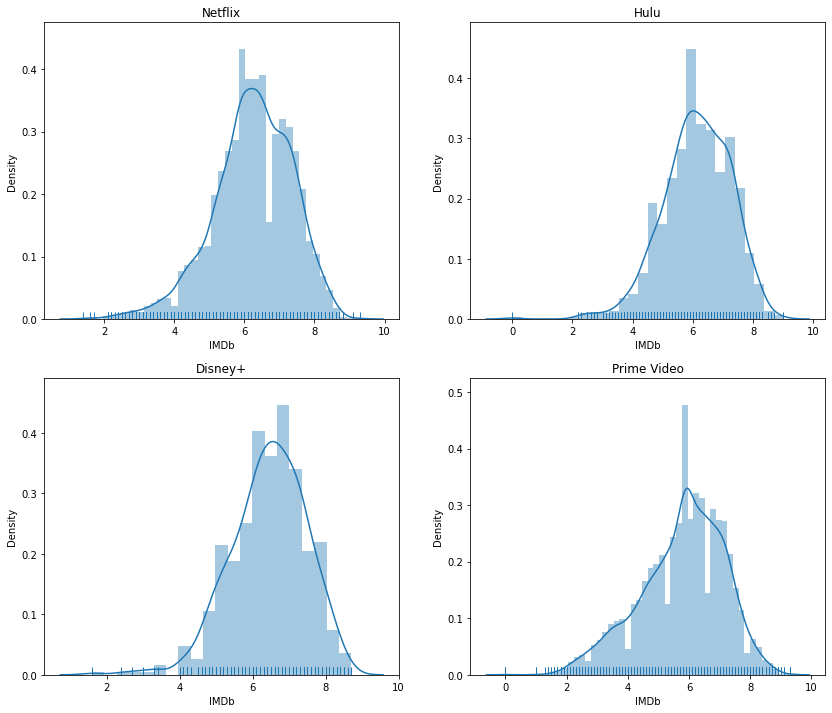

In [30]:
factor("IMDb")

5/ Which movies have the highest IMDb ?

In [31]:
# Show top 10 movies
top_10 = df_join.sort_values(by = "IMDb", ascending = False).head(10)
# Show it by plotly.express
pe.bar(top_10,x="Title",y="IMDb",color="Country",hover_data=["Channel","Genres","Year"])


Above image, Top 10 Movies have the highest IMDb include 5 movies are produced by the US and all copyright of Prime Video (Square One, Steven Banks, Love on a leash, Where's Daddy, A Dog Named Gucci). Most genres are Documentary and all are produced in lately years. 

This genres usually talk biography of life or unfortunate event about someone. For example Square One talks about the life and success of Michale Jackson, Where's Daddy discusses the problem of distinction with African-American children. => I think kind of genre can be easily to sympathize with the audience and that why it have a high IMDb rating 

Almost, 8/10 movies in top 10 is publiced on Prime Video and just one talk-show on Netflix

6/ Which genres are the most popular ?

Text(0.5, 1.0, 'Top 10 Popular Genres')

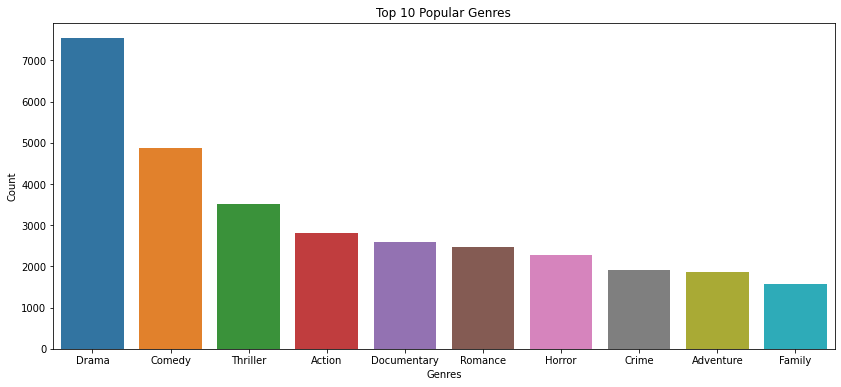

In [32]:
# Seperated_genres
lists = [] 
genres = []
for i in df_join["Genres"]:
  word = i.split(",")
  lists.append(word)
  for j in range (len(word)):
    genres.append(word[j])

# DataFrame genres:
genres = pd.DataFrame(genres,columns=["Genres"])
genres = genres["Genres"].value_counts().sort_values(ascending = False).iloc[:10]

# Show top 10 popular genres
plt.figure(figsize=(14,6))
sns.barplot(genres.index,genres.values)
plt.ylabel("Count")
plt.xlabel("Genres")
plt.title("Top 10 Popular Genres")

Easily see that Drama is the most popular genre. Next to a Comedy, Thriller and Action. The surprise that in spite of the highest number of top IMDb, but Documentary is'nt a ppopular genres. 

7/ Which languages are more popular in movies ?

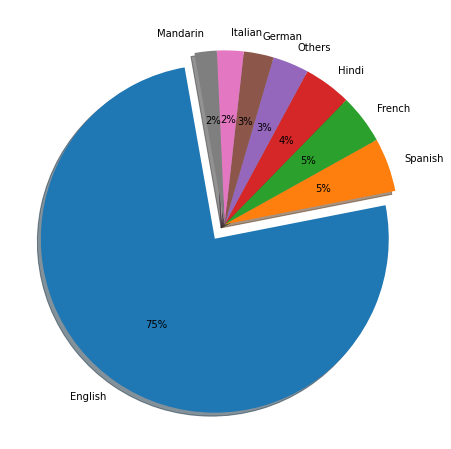

In [33]:
# Seperated_language
lists = [] 
languages = []
for i in df_join["Language"]:
  language = i.split(",")
  lists.append(language)
  for j in range (len(language)):
    languages.append(language[j])

# DataFrame genres:
lan = pd.DataFrame(languages,columns=["Language"])
#lan = lan["Language"].value_counts().sort_values(ascending = False).iloc[:10]

# labels:
lab = lan["Language"].value_counts().sort_values(ascending = False).iloc[:8].keys().tolist()
#values
value = lan["Language"].value_counts().iloc[:8].values.tolist()

plt.figure(figsize = (8,8))
explode = (0.1, 0, 0,0,0,0,0,0)
plt.pie(value,labels = lab,autopct= '%1.f%%',startangle = 100,explode = explode, shadow = True)
plt.show() # To remove text line

8/ Which channel has the highest number of movies on this dataset

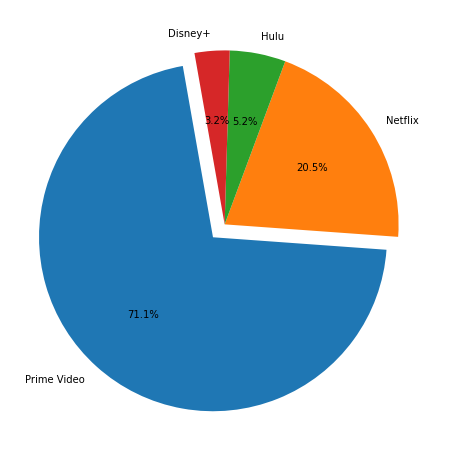

In [34]:
# labels:
lab = df_join["Channel"].value_counts().keys().tolist()
#values
value = df_join["Channel"].value_counts().values.tolist()

# Tree map
plt.figure(figsize = (8,8))
explode = (0.1, 0, 0,0)
plt.pie(value,labels = lab,autopct= '%1.1f%%',startangle = 100, explode = explode)
plt.show() # To remove text line

In [35]:
# Box plot Each Channel

9/ Which movies have the highest IMDb in each channel

<img src="https://m.media-amazon.com/images/G/01/support_images/GUID-A5E374A8-16DA-4B39-8E3F-3F3B34E831FB=2=en-US=Normal.png" width="50%"  height="0%" align="center" hspace="40%" vspace="0%"/>

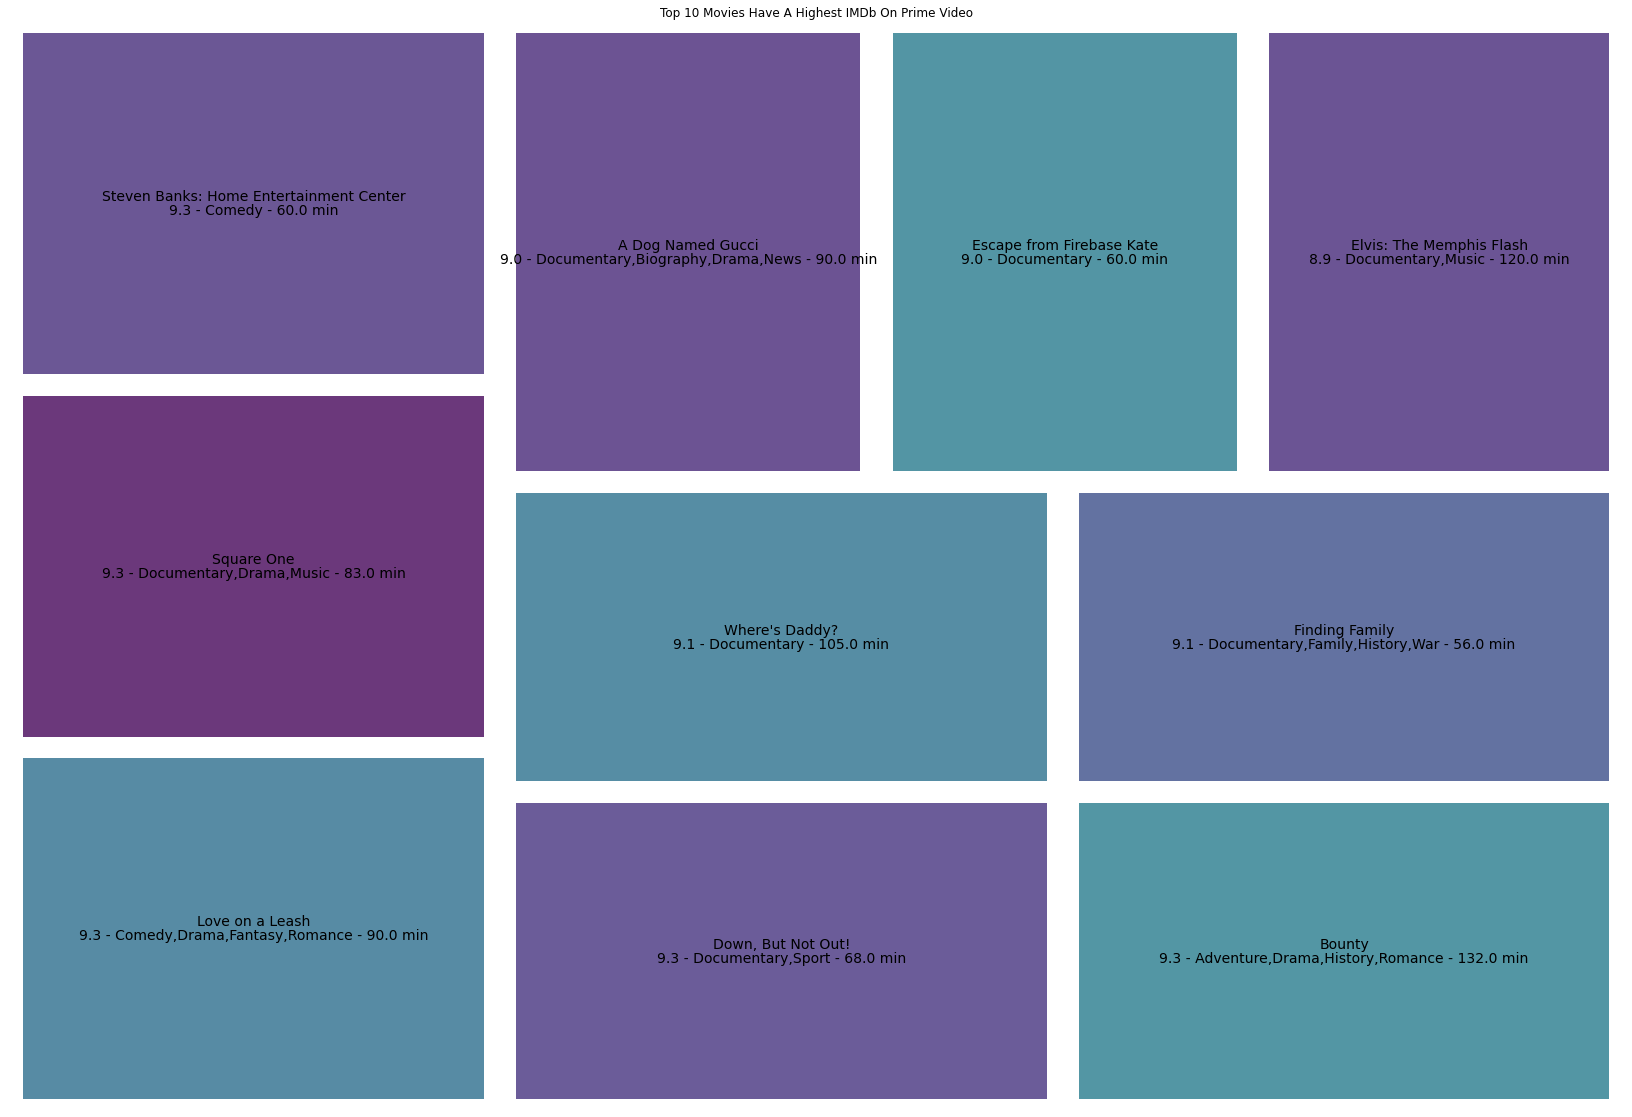

In [36]:
# Drawing Treemap with squarify

IMDb = filter_PrimeVideo.sort_values(by="IMDb", ascending = False).head(10)
IMDb["value"] = IMDb["IMDb"].astype(str) + " - " + IMDb["Genres"].astype(str) + " - " + IMDb["Runtime"].astype(str) + " min"

plt.figure(figsize = (29,20))
squarify.plot(sizes = IMDb["IMDb"], label = IMDb["Title"], alpha = 0.8, pad = True,value= IMDb["value"],text_kwargs={"size":"14","color":"black"})
plt.axis("off")
plt.title("Top 10 Movies Have A Highest IMDb On Prime Video")
plt.show()

<img src="https://cellphones.com.vn/sforum/wp-content/uploads/2021/06/d80646d0-4429-11eb-9dce-47010f84228e.jpg" width="60%"  height="0%" align="center" hspace="30%" vspace="0%"/>

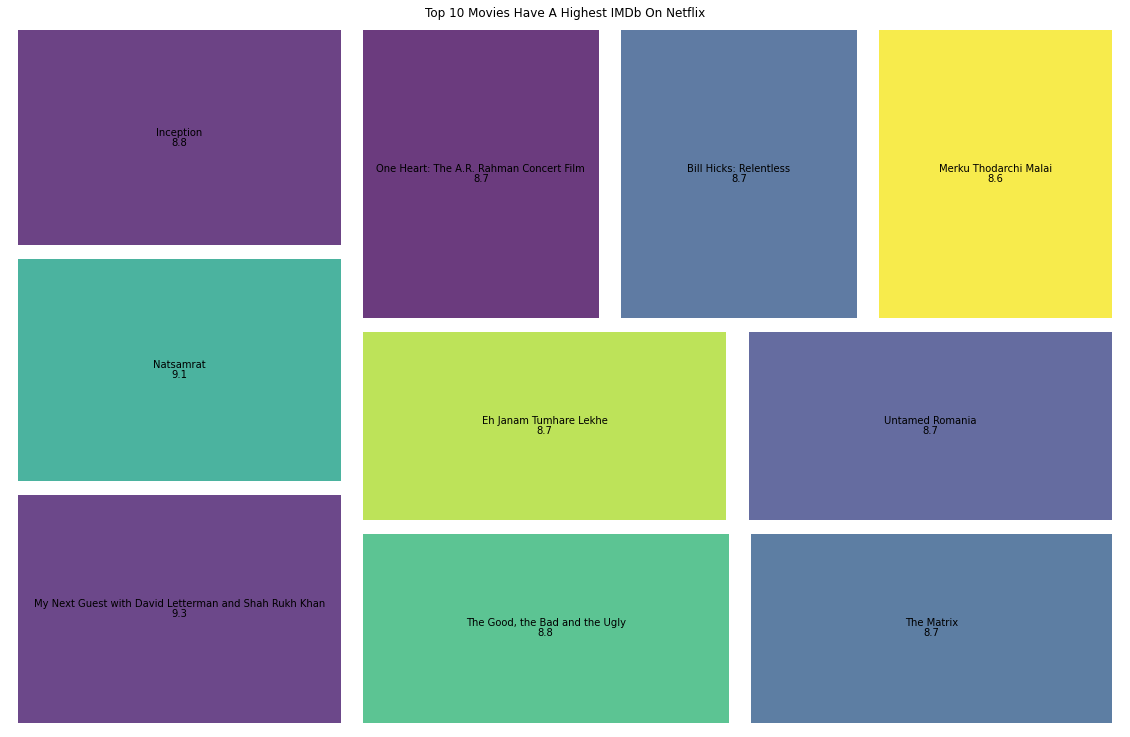

In [37]:
IMDb = filter_Netflix.sort_values(by="IMDb", ascending = False).head(10)

plt.figure(figsize = (20,13))
squarify.plot(sizes = IMDb["IMDb"], label = IMDb["Title"], alpha = 0.8, pad = True,value= IMDb["IMDb"])
plt.axis("off")
plt.title("Top 10 Movies Have A Highest IMDb On Netflix")
plt.show()

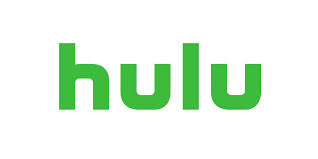

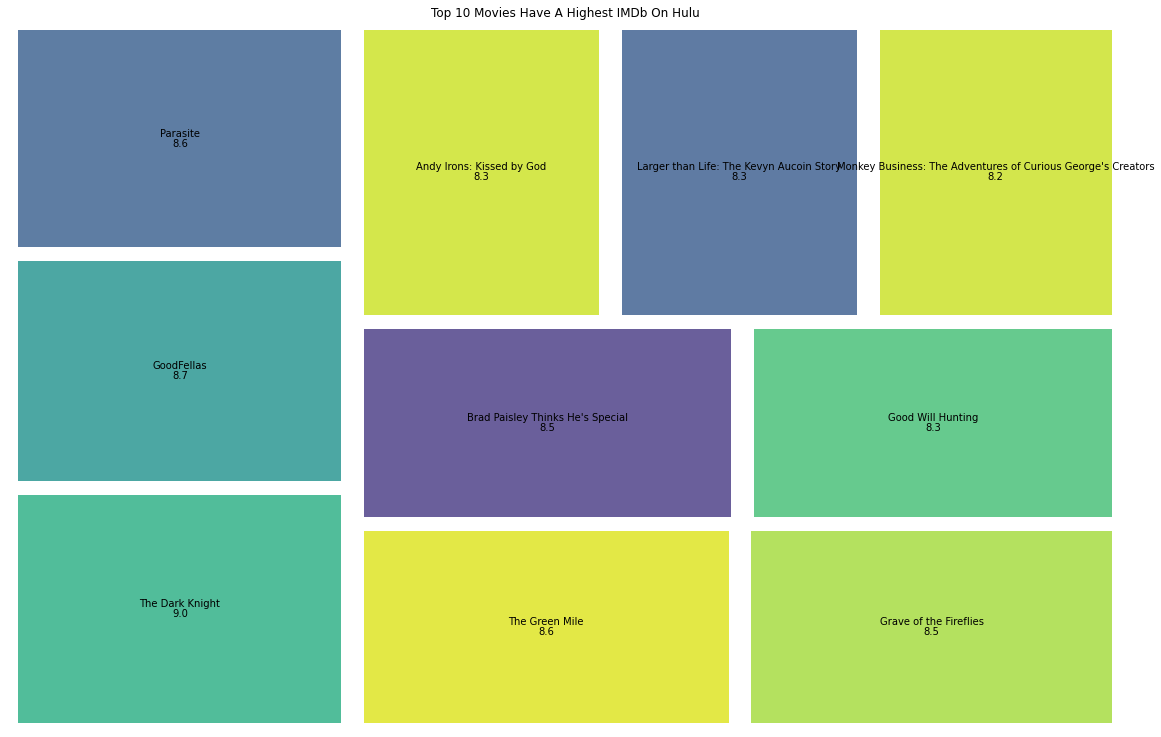

In [38]:
IMDb = filter_Hulu.sort_values(by="IMDb", ascending = False).head(10)

plt.figure(figsize = (20,13))
squarify.plot(sizes = IMDb["IMDb"], label = IMDb["Title"], alpha = 0.8, pad = True,value= IMDb["IMDb"])
plt.axis("off")
plt.title("Top 10 Movies Have A Highest IMDb On Hulu")
plt.show()

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3e/Disney%2B_logo.svg" width="60%"  height="0%" align="center" hspace="30%" vspace="0%"/>

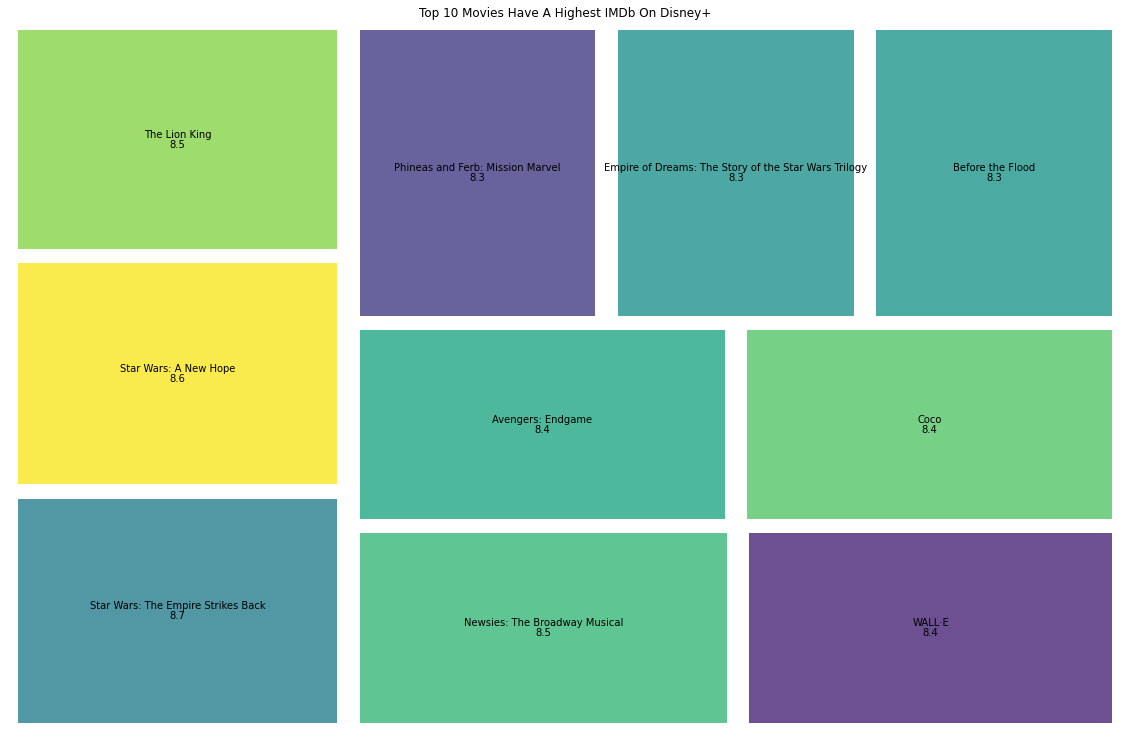

In [39]:
IMDb = filter_Disney.sort_values(by="IMDb", ascending = False).head(10)

plt.figure(figsize = (20,13))
squarify.plot(sizes = IMDb["IMDb"], label = IMDb["Title"], alpha = 0.8, pad = True,value= IMDb["IMDb"])
plt.axis("off")
plt.title("Top 10 Movies Have A Highest IMDb On Disney+")
plt.show()

10/ How is the relationship between IMDb and Runtime ?

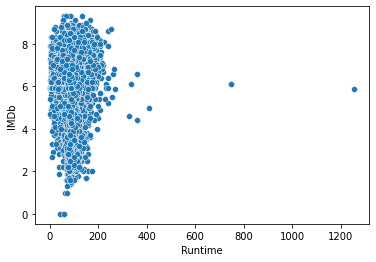

In [40]:
sns.scatterplot(y=df_join["IMDb"], x= df_join["Runtime"], data = df_join)

In this scatterplot, we can easily see that the focus IMDb spots are in the range 0 - 200 min run time. When IMDb spots pass this range, it's so hard to get a good IMDb 

**DATA BININNG**

The IMDb and Runtime column are separated to 3 equal parts

In [41]:
# Create a bins of IMDb
bins = np.linspace(min(df["IMDb"]),max(df["IMDb"]),4)
group_IMDb = ["Low_Rate","Medium_Rate","High_Rate"]
df["IMDb_rate"] = pd.cut(df["IMDb"],bins,labels = group_IMDb,include_lowest=True)

In [42]:
# Create a bins of Runtime

df = df.loc[df["Runtime"] < 300 ] # Because runtime have a large outliers so we need to drop it
bins = np.linspace(min(df["Runtime"]),max(df["Runtime"]),4)
group_runtime = ["Short Time","Medium Time","Long Time"]
df["Runtime_rate"] = pd.cut(df["Runtime"],bins,labels = group_runtime,include_lowest=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
# Join df_join, IMDb_rate, Runtime_rate
join = pd.concat([df["Runtime_rate"],df["IMDb_rate"]], axis = 1)
join = pd.concat([join,df_join], axis = 1)
join = join.dropna()

IMDb Rating with Runtime_rate and Channel ? 

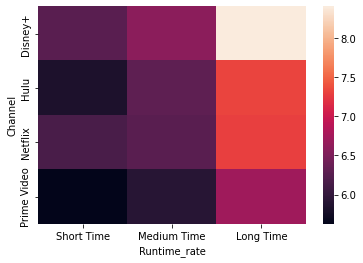

In [44]:
# The heatmap between Runtime_rate and Channel
heatmap = pd.pivot_table(join,values="IMDb",aggfunc="mean",index=["Channel"],columns="Runtime_rate") # Create a pivot table with month index and year column, sum of Quantity
sns.heatmap(heatmap,annot = False)

**HYPOTHESIS TESTING**

In [45]:
short_time = join[join["Runtime_rate"] == "Short Time"]
long_time = join[join["Runtime_rate"] == "Long Time"]

In common, movies have a long time (>160 min) on all channels that have higher average IMDb and opposite => Maybe viewers rather watching feature films than series movies 

To prove the above hypothesis, we need to use a hypothesis 2 variables analytic technique. We follow the hypothesis:

(u2: the average IMDb of Long Time, u1: the average IMDb of Short Time)

H0: u2 - u1 <= 0
H1: u2 - u1 > 0



We get random 60 movies in both short time and long time

In [46]:
short_time = short_time.sample(60)
long_time = long_time.sample(60)

In [47]:
# Checking the distribution for normality
# Set the alpha level
alpha=0.05

# We pass groups to the criterion for testing
stat, pval = shapiro(long_time['IMDb'])

print('Statistic:', f'{stat:.3f}')
print('P-Value:', f'{pval:.20f}')
    
# Checking the condition for accepting or rejecting H0
if pval > alpha:
    print('Accept H0 - Data is distributed normally.')
if pval < alpha:
    print('Reject H0 - Data is not distributed normally.')

Statistic: 0.954
P-Value: 0.02416804246604442596
Reject H0 - Data is not distributed normally.


In [48]:
# Caculate z of short_time
xbar1 = short_time["IMDb"].mean()
s1 = short_time["IMDb"].std(ddof=1)
n1 = short_time["IMDb"].shape[0]
m1= (s1**2)/n1

In [49]:
# Caculate z of long_time
xbar2 = long_time["IMDb"].mean()
s2 = long_time["IMDb"].std(ddof=1)
n2 = long_time["IMDb"].shape[0]
m2= (s2**2)/n2

In [50]:
# Caculate Z
Z = (xbar2-xbar1)/(m1 + m2)**0.5

In [51]:
from scipy.stats import norm
alpha = 0.05
zleft = norm.ppf(alpha/2,0,1)
zright = - zleft
print(zleft,zright) 
print("Shall we reject Ho:", Z> zright or Z < zleft)
print("Avg IMDb of Long Time is higher than Avg IMDb of Short Time")

-1.9599639845400545 1.9599639845400545
Shall we reject Ho: True
Avg IMDb of Long Time is higher than Avg IMDb of Short Time


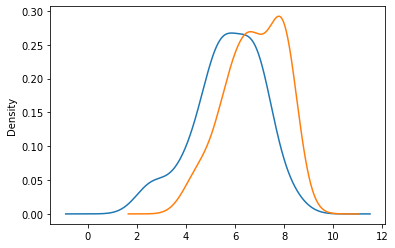

In [52]:
short_time["IMDb"].plot(kind="density")
long_time["IMDb"].plot(kind="density")